# SOK-1006 Mikro
## Seminar 3
### Oppgave 2

In [1]:
# importer pakkene som vi trenger
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [2]:
# definer symboler
N,K,s=sp.symbols('N K s', positive=True)

In [3]:
def prod(N,K,s):
    return N**s*K**(1-s)
prod(N,K,s)

K**(1 - s)*N**s

Deloppgave a)

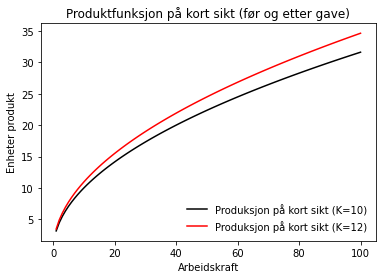

In [4]:
N_num=np.linspace(1,100,100)

plt.plot(N_num,prod(N_num,10,.5), label='Produksjon på kort sikt (K=10)', color='black')
plt.plot(N_num,prod(N_num,12,.5), label='Produksjon på kort sikt (K=12)', color='red')

plt.legend(loc='lower right', frameon=False)

plt.ylabel('Enheter produkt')
plt.xlabel('Arbeidskraft')

plt.title('Produktfunksjon på kort sikt (før og etter gave)')
plt.show()

#### Deloppgave b)

In [5]:
# grenseproduktivitet til N
mp_N=sp.simplify(sp.diff(prod(N,K,s),N))
mp_N

K**(1 - s)*N**(s - 1)*s

In [6]:
# grenseproduktivitet til K
mp_K=sp.simplify(sp.diff(prod(N,K,s),K))
mp_K

(N/K)**s*(1 - s)

In [7]:
# Må gjøre om til funksjoner for å kunne tegne disse

MP_N_fn=sp.lambdify((N,K,s), mp_N)
MP_N_fn(N,K,s)


K**(1 - s)*N**(s - 1)*s

In [8]:
MP_K_fn=sp.lambdify((N,K,s), mp_K)
MP_K_fn(N,K,s)

(N/K)**s*(1 - s)

In [9]:
def MP_N_ex(s):
    return MP_N_fn(N,5*N,s)
MP_N_ex(s)

N**(s - 1)*s*(5*N)**(1 - s)

In [10]:
def MP_K_ex(s):
    return MP_K_fn(N,5*N,s)
MP_K_ex(s)

(1 - s)/5**s

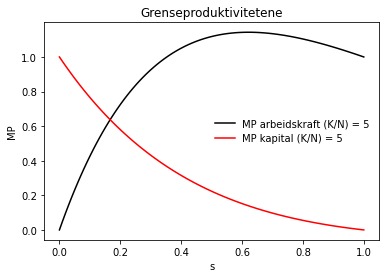

In [11]:
s_num=np.linspace(0,1,100)
plt.plot(s_num,MP_N_ex(s_num), label='MP arbeidskraft (K/N) = 5', color='black')
plt.plot(s_num,MP_K_ex(s_num), label='MP kapital (K/N) = 5', color='red')

plt.legend(loc='center right', frameon=False)

plt.ylabel('MP')
plt.xlabel('s')

plt.title('Grenseproduktivitetene')
plt.show()

#### Deloppgave c)

In [12]:
# gjennomsnittsproduktivitet N
def AP_N(N,K,s):
    return prod(N,K,s)/N
AP_N(N,K,s)


K**(1 - s)*N**s/N

In [13]:
# gjennomsnittsproduktivitet K
def AP_K(N,K,s):
    return prod(N,K,s)/K
AP_K(N,K,s)

K**(1 - s)*N**s/K

In [14]:
# Sett inn K=5*N
def AP_N_ex(s):
    return AP_N(N,5*N,s)
sp.simplify(AP_N_ex(s))

5**(1 - s)

In [15]:
def AP_K_ex(s):
    return AP_K(N,5*N,s)
sp.simplify(AP_K_ex(s))

5**(-s)

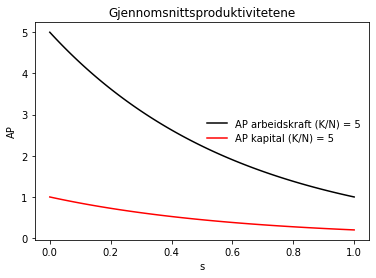

In [16]:
plt.plot(s_num,AP_N_ex(s_num), label='AP arbeidskraft (K/N) = 5', color='black')
plt.plot(s_num,AP_K_ex(s_num), label='AP kapital (K/N) = 5', color='red')

plt.legend(loc='center right', frameon=False)

plt.ylabel('AP')
plt.xlabel('s')

plt.title('Gjennomsnittsproduktivitetene')
plt.show()

#### Deloppgave d)

Prosentvise endringer bør få deg til å tenke på elastisiteter........

Her vil vi frem til den %-vise endringen i produksjon fra en %-vis endring i K. Produksjonselastisiteten til kapital er gitt ved $\frac{\partial x}{\partial K}\frac{K}{x}$.

In [17]:
def elast_K(K,N,s):
    return sp.diff(prod(N,K,s),K)*(K/prod(N,K,s))
elast_K(K,N,s)

K**(1 - s)*K**(s - 1)*(1 - s)

Vi må av og til hjelpe Python med å forkorte uttrykk:

In [18]:
sp.simplify(elast_K(N,K,s))

1 - s

Dette er eksponenten til kapital i produktfunksjonen. Dette har vi sett i sok-1004 (Forelesning 10). En 1% økning i K fører til en (1-s)% økning i produksjon. Dvs en 10% økning i K fører til en 10(1-s)% økning i produksjon.

#### Deloppgave e)

Her vil vi frem til den %-vise endringen i produksjon fra en %-vis endring i N. Produksjonselastisiteten til arbeidskraft er gitt ved $\frac{\partial x}{\partial N}\frac{N}{x}$.

In [19]:
def elast_N(K,N,s):
    return sp.diff(prod(N,K,s),N)*(N/prod(N,K,s))
elast_N(K,N,s)

K**(1 - s)*K**(s - 1)*s

In [20]:
sp.simplify(elast_N(N,K,s))

s

Dette er eksponenten til arbeidskraft i produktfunksjonen. En 1% økning i N fører til en s% økning i produksjon. Dvs en 5% nedgang i N fører til en 5s% reduksjon i produksjon.

#### Deloppgave f)

Produksjonsisokvanten har formel $5=N^{.5}K^{.5}$. Dersom vi løser dette for K kan vi plotte isokvanten.

In [21]:
iso_5=sp.solve(prod(N,K,s)-5,K)[0]
iso_5

N**(s/(s - 1))/5**(1/(s - 1))

In [22]:
# for å kunne tegne

iso_5_fn=sp.lambdify((N,s), iso_5)
iso_5_fn(N,s)

N**(s/(s - 1))/5**(1/(s - 1))

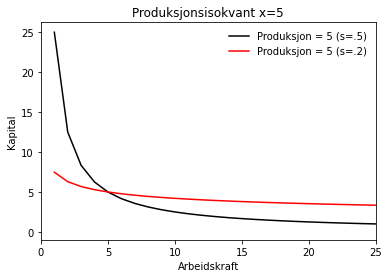

In [30]:
plt.plot(N_num,iso_5_fn(N_num,.5), label='Produksjon = 5 (s=.5)', color='black')
plt.plot(N_num,iso_5_fn(N_num,.2), label='Produksjon = 5 (s=.2)', color='red')

plt.legend(loc='upper right', frameon=False)

plt.ylabel('Kapital')
plt.xlabel('Arbeidskraft')

plt.title('Produksjonsisokvant x=5')

plt.xlim(0,25)
plt.show()

#### Deloppgave g)

MTSB defineres i læreboka på s. 130, likning 4.10 for produktfunksjon $x=f(N,K)$: $MTSB=\frac{f'{_{N}}}{f'{_{K}}}$.

In [24]:
MTSB=sp.simplify(mp_N/mp_K)
MTSB

-K*s/(N*(s - 1))

Vi kan tenke på dette som $MTSB=\frac{K}{N} \frac{s}{1-s}$ slik at vi kan tegne den delen av funksjonen som er avhengig av s. Endringer i K/N vil skalere MTSB opp eller ned.

In [25]:
MTSB_fn=sp.lambdify((K,N,s), MTSB)
MTSB_fn(K,N,s)

-K*s/(N*(s - 1))

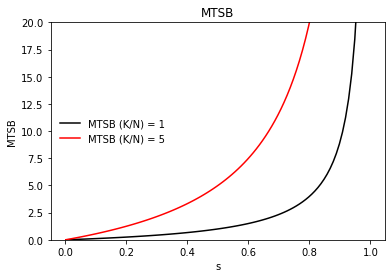

In [26]:
# tegner K/N =1 (sort) og K/N =5 (rødt)
s_ny=np.linspace(0.001,.999,100)
plt.plot(s_ny,MTSB_fn(1,1,s_ny), label='MTSB (K/N) = 1', color='black')
plt.plot(s_ny,MTSB_fn(5,1,s_ny), label='MTSB (K/N) = 5', color='red')

plt.legend(loc='center left', frameon=False)

plt.ylabel('MTSB')
plt.xlabel('s')

plt.title('MTSB')

plt.ylim(0,20)
plt.show()

#### Deloppgave h)

Vi bruker samme triks som i oppgave 1 ved å doble innsatsfaktorene, og se om vi får ut mer eller mindre enn 2 ganger opprinnelig produksjon. Her må vi doble både K og N.

In [27]:
def prod_2(N,K,s):
    return (2*N)**s*(2*K)**(1-s)
prod_2(N,K,s)

(2*K)**(1 - s)*(2*N)**s

In [28]:
def overskudd(N,K,s):
    return prod_2(N,K,s)-2*prod(N,K,s)
overskudd(N,K,s)

-2*K**(1 - s)*N**s + (2*K)**(1 - s)*(2*N)**s

In [29]:
sp.simplify(overskudd(N,K,s))

0

Her ser vi igjen at det er viktig å prøve å forenkle matematiske uttrykk! Vi ser at denne teknologien viser konstant skalautbytte - en fordobling av innsatsfaktorene fører til nøyaktig dobbel så mye produksjon.